In [197]:
from nltk.corpus import reuters, stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer 
from wordcloud import WordCloud
from nltk.util import ngrams
import pandas as pd
import matplotlib.pyplot as plt
import re


Bad key "text.kerning_factor" on line 4 in
C:\Users\TinkerBell\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [198]:
# import nltk
# nltk.download('wordnet')
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

In [222]:
#crude_article = reuters.raw(fileids=reuters.fileids(categories='crude')[2])
ids = reuters.fileids(categories='crude')
corpus = [reuters.raw(i) for i in ids]
big_string = ' '.join(corpus)

In [41]:
#len(sent_tokenize(crude_article))

9

In [102]:
sw = set(stopwords.words('english'))
sw_addon = {'said', 'mln', 'kilolitres','kl', 'also', 'could','would'}
sw_union = sw.union(sw_addon)

In [228]:
 # define stopwording and regex 
def process_text(article, swu):
    #t_sentence = sent_tokenize(article)
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', article)
    text_clean=[]
    #for sent in t_sentence:
    t_word=word_tokenize(re_clean)
    first_pass= [word.lower() for word in t_word if word.lower() not in swu]
    txt_out = [lemmatizer.lemmatize(word, pos='a') for word in first_pass if len(word)>2]
    #text_clean.append([regex.sub('', word) for word in sec_pass])
    return txt_out

In [229]:
tokenized_article = process_text(big_string, sw_union)
tokenized_article[:10]

['japan',
 'revise',
 'longterm',
 'energy',
 'demand',
 'downwards',
 'ministry',
 'international',
 'trade',
 'industry']

In [213]:
from collections import Counter

In [230]:
word_counts = Counter(tokenized_article)
word_counts.most_common(20)

[('oil', 2208),
 ('dlrs', 751),
 ('crude', 645),
 ('pct', 583),
 ('prices', 578),
 ('bpd', 474),
 ('opec', 467),
 ('barrels', 403),
 ('year', 395),
 ('production', 385),
 ('last', 383),
 ('gas', 304),
 ('barrel', 304),
 ('price', 303),
 ('energy', 287),
 ('gulf', 280),
 ('company', 273),
 ('billion', 268),
 ('petroleum', 258),
 ('one', 246)]

In [232]:
bigram_counts = Counter(ngrams(tokenized_article, n=2))
#bigram_counts.items()

In [233]:
bigram_counts.most_common(10)

[(('crude', 'oil'), 340),
 (('oil', 'prices'), 203),
 (('dlrs', 'barrel'), 175),
 (('per', 'day'), 122),
 (('billion', 'dlrs'), 114),
 (('oil', 'gas'), 114),
 (('last', 'year'), 112),
 (('barrels', 'per'), 105),
 (('saudi', 'arabia'), 104),
 (('natural', 'gas'), 100)]

In [234]:
bigram_df = pd.DataFrame({'bigram': [key for key in bigram_counts.keys()], 
                          'frequency': [val for val in bigram_counts.values()]}, 
                           index=range(0, len(bigram_counts.keys())))

In [235]:
bigram_df.nlargest(10, 'frequency')

,bigram,frequency
935,"(crude, oil)",340
248,"(oil, prices)",203
251,"(dlrs, barrel)",175
1141,"(per, day)",122
286,"(billion, dlrs)",114
831,"(oil, gas)",114
242,"(last, year)",112
1140,"(barrels, per)",105
2927,"(saudi, arabia)",104
68,"(natural, gas)",100


In [236]:
input_text = ' '.join(process_text(big_string, sw_union))


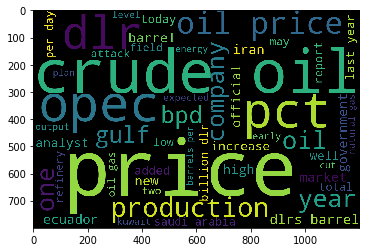

In [237]:
wc = WordCloud(width=1200, height=800, max_words=50).generate(input_text)
plt.imshow(wc)